# I. Introduction 
The Adult Income dataset, also known as the "Census Income" dataset, is a popular dataset for classification tasks in the field of machine learning and data analytics. It is derived from the 1994 US Census Bureau database and contains socio-economic information on individuals, focusing on their income levels. The primary goal of working with this dataset is to predict whether an individual's income exceeds $50,000 per year based on various demographic and financial features.

The dataset consists of 48,842 instances, each representing an individual, and 14 attributes that describe various aspects of the individual's background. These attributes include both continuous and categorical variables, such as age, workclass, education, marital status, occupation, relationship, race, sex, capital gain, capital loss, hours per week, and native country.

The target variable in the dataset is "income," which is a binary classification problem with two categories: <=50K and >50K. By analyzing the relationships between the features and the income levels, machine learning models can be trained to predict income categories for new instances. This information can be valuable in numerous real-world applications, such as targeted marketing campaigns, income inequality studies, and public policy development.

# II. Data Description:
* age: The age of an individual (continuous variable). Age can be an important factor in income prediction as income often increases with age due to factors such as experience, seniority, and promotions.

* workclass: The employment sector of an individual (categorical variable). This includes Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, and Without-pay. Different work classes can have different salary structures, which may impact the income prediction.

* fnlwgt: The final weight, representing the number of people the census believes the entry represents (continuous variable). This variable is not directly related to income prediction but can be used for sampling purposes during analysis.

* education: The highest level of education completed by an individual (categorical variable). Education is a key factor in income prediction as higher levels of education often lead to better job opportunities and higher salaries.

* education_num: The numeric representation of the education level (continuous variable). This is an alternative representation of the 'education' attribute and directly corresponds to the income prediction.

* marital_status: The marital status of an individual (categorical variable). This includes Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, and Married-AF-spouse. Marital status can indirectly affect income prediction, as it may influence factors such as financial stability and dual-income households.

* occupation: The job role or profession of an individual (categorical variable). Different occupations have different salary ranges and growth opportunities, which can impact the income prediction.

* relationship: The family relationship of an individual (categorical variable). This includes Wife, Own-child, Husband, Not-in-family, Other-relative, and Unmarried. Similar to marital status, relationship status can indirectly affect income prediction through factors such as financial stability and dual-income households.

* race: The race of an individual (categorical variable). While race should not directly impact income, it can be useful for understanding income distribution and potential biases in the dataset.

* sex: The gender of an individual (categorical variable). Analyzing the income distribution based on gender can provide insights into potential income disparities and biases.

* capital_gain: The profit made by an individual from the sale of property or an investment (continuous variable). Capital gains can contribute to an individual's overall income and are directly related to the income prediction.

* capital_loss: The loss suffered by an individual from the sale of property or an investment (continuous variable). Capital losses can reduce an individual's overall income and are directly related to the income prediction.

* hours_per_week: The number of hours worked by an individual per week (continuous variable). Hours per week can impact income prediction, as more hours worked typically result in higher earnings.

* native_country: The country of origin for an individual (categorical variable). While the native country itself might not directly affect income prediction, it can be useful for understanding the income distribution among different countries or regions.

# III. Import and clean data


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from dython.nominal import theils_u
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
data = pd.read_csv(url, header=None, names=column_names, na_values=' ?')


In [2]:
data.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Dealing with duplicated rows

In [3]:
#Check for duplicated rows
duplicates = data.duplicated()
print(f"Number of duplcate rows: {duplicates.sum()}")

Number of duplcate rows: 24


In [4]:
# Remove duplicated rows
data = data.drop_duplicates()

### Dropping unuseful columns
* native-country: keep only United States instances and the drop the whole column
* fnlwgt: meaningless
* education: drop because duplicated with education-num
* marital status: drop becaues highly correlated with relationship
* occupation: drop because of unproper categorizing and too many unique value
* sex: drop because highly correlated with relationship
* capital gain: nearly all values equal 0
* capital loss: nearly all values equal 0

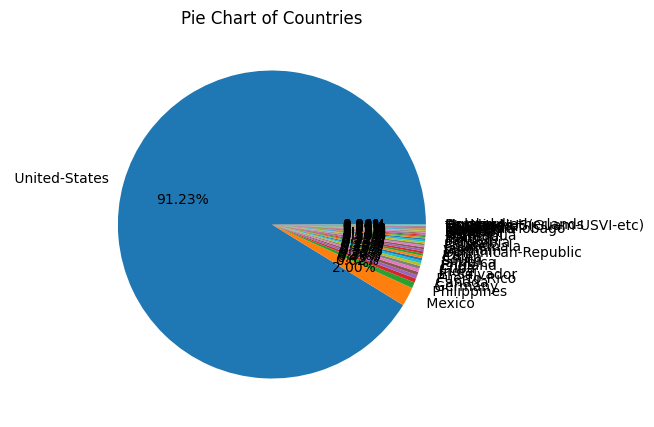

In [5]:
country_count = data['native-country'].value_counts()
fig, ax = plt.subplots(figsize = (5, 5))
ax.pie(country_count.values, labels = country_count.index, autopct='%1.2f%%', startangle=0)
ax.set_title('Pie Chart of Countries')
plt.show()

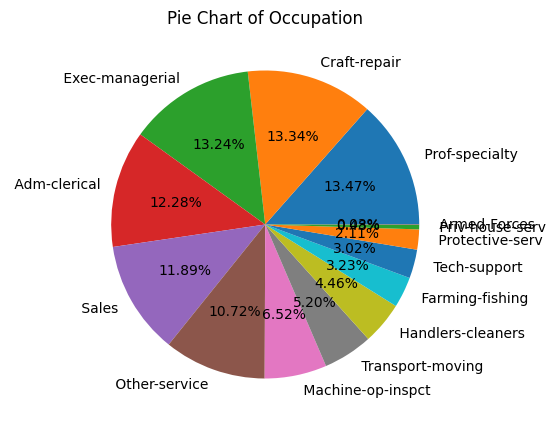

In [6]:
country_count = data['occupation'].value_counts()
fig, ax = plt.subplots(figsize = (5, 5))
ax.pie(country_count.values, labels = country_count.index, autopct='%1.2f%%', startangle=0)
ax.set_title('Pie Chart of Occupation')
plt.show()

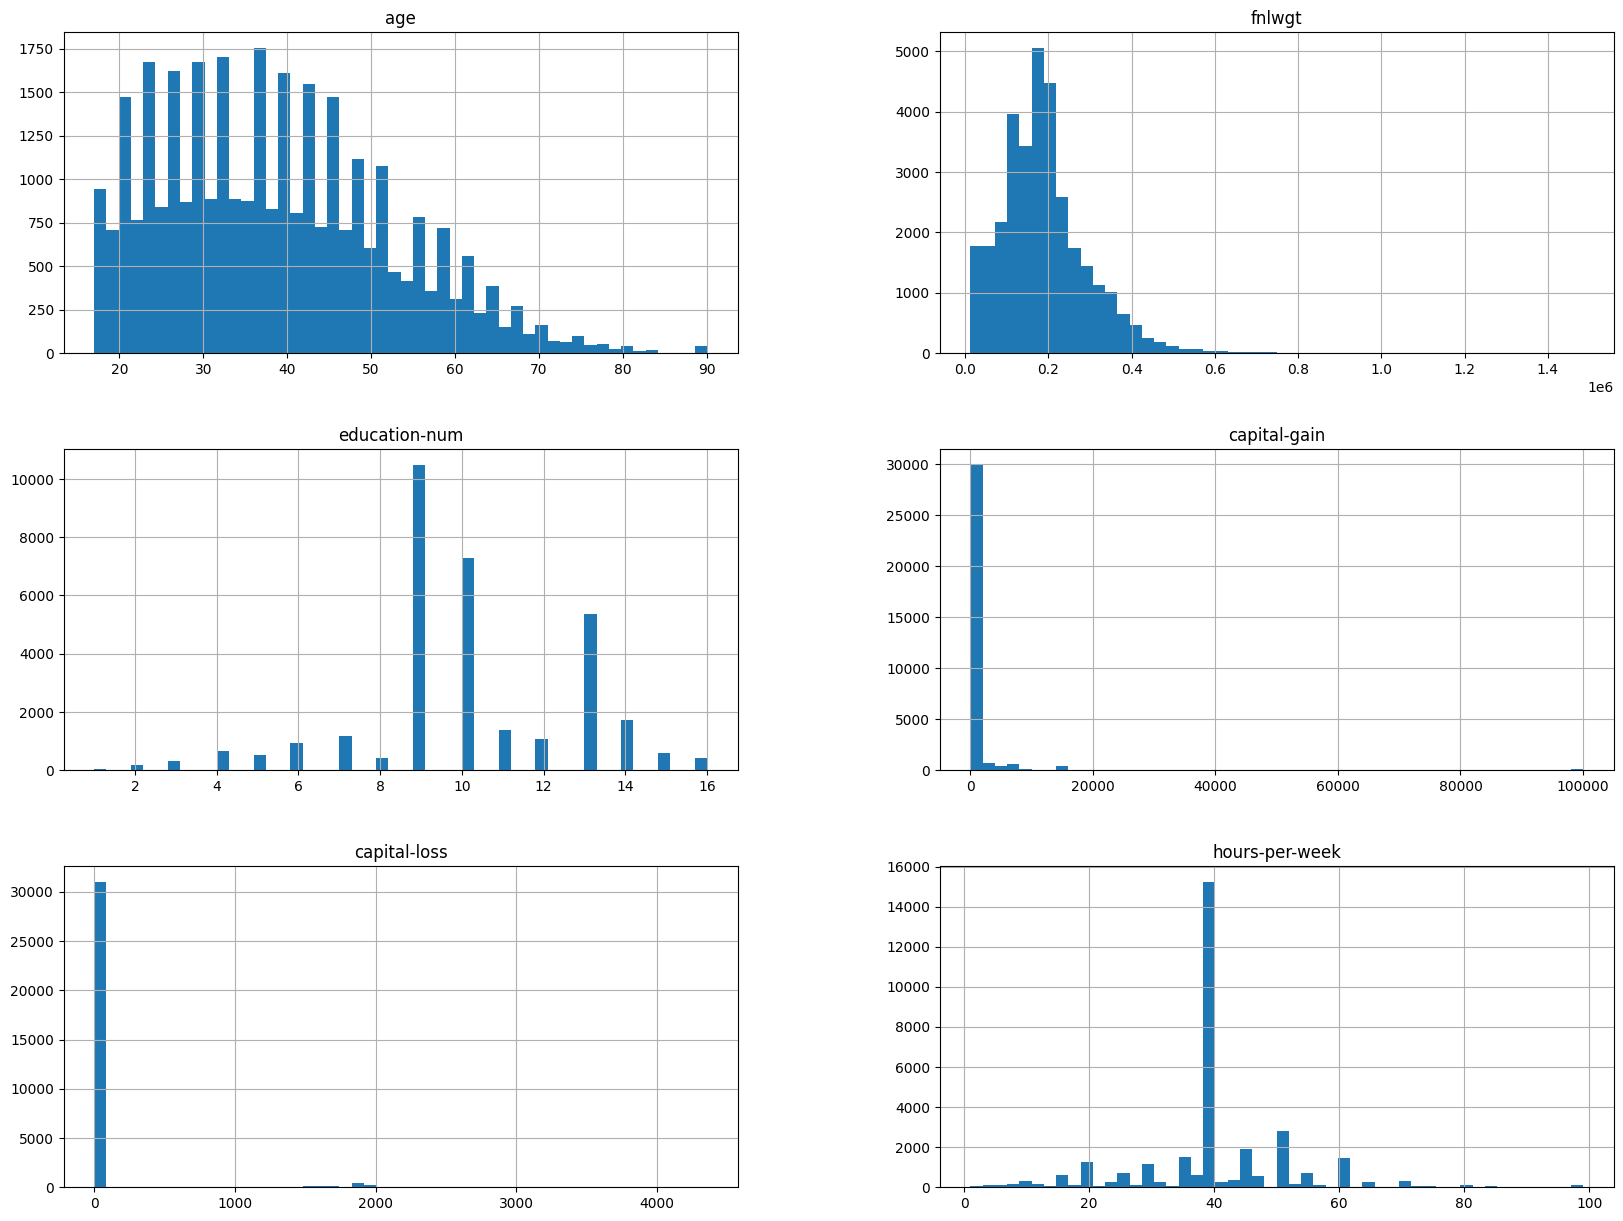

In [7]:
data.hist(bins=50, figsize=(20, 15))
plt.show()

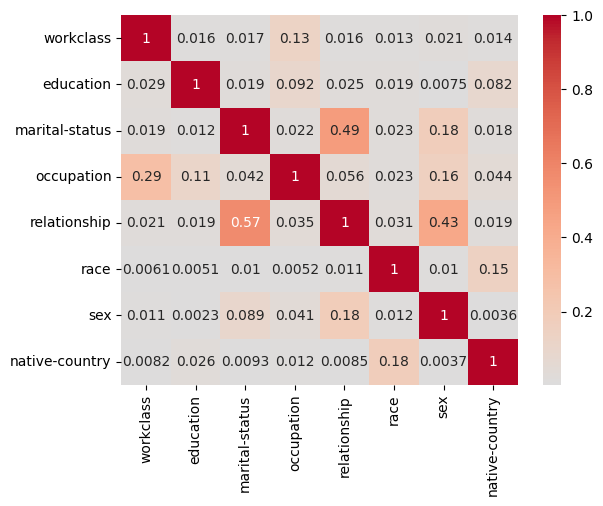

In [8]:
categorical_columns = ['workclass', 'education', 'marital-status', 'occupation',
                       'relationship', 'race', 'sex', 'native-country']
data_categorical = data[categorical_columns]

# Compute Theil's U matrix
theils_u_matrix = data_categorical.apply(lambda x: data_categorical.apply(lambda y: theils_u(x, y)))

# Visualize the Theil's U matrix using a heatmap
sns.heatmap(theils_u_matrix, annot=True, cmap='coolwarm', center=0)
plt.show()

### Dropping instances with missing values

In [9]:
# Filter the dataset to include only instances with 'native-country' set to 'United-States'
data = data[data['native-country'] == ' United-States']

# Handle missing values: Replace '?' with NaN and drop rows with missing values
data.replace('?', np.NaN, inplace=True)
data.dropna(inplace=True)

In [10]:
# Keep only the specified columns
data = data[['age', 'workclass', 'education-num', 'relationship', 'race', 'hours-per-week', 'income']]

### Dealing with outliers
To make sure that the analysis is robust and not overly influenced by the extreme values, we replace outliers that are beyond 95th percentile with the 95th percentile

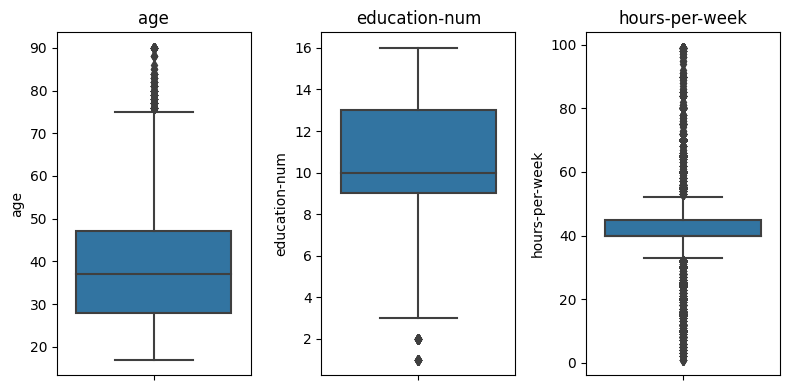

In [11]:
numerical_columns = ['age', 'education-num', 'hours-per-week']
fig, axes = plt.subplots(ncols = len(numerical_columns), nrows = 1, figsize = (8, 4))
for i, col in enumerate(numerical_columns):
    sns.boxplot(y=col, data=data, ax=axes[i])
    axes[i].set_title(col)
    
plt.tight_layout()
plt.show()

In [12]:
for col in numerical_columns:
    q95 = data[col].quantile(0.95)
    data[col]=data[col].clip(upper=q95)

# IV. Insights gain

 <=50K    20494
 >50K      6993
Name: income, dtype: int64


<Axes: >

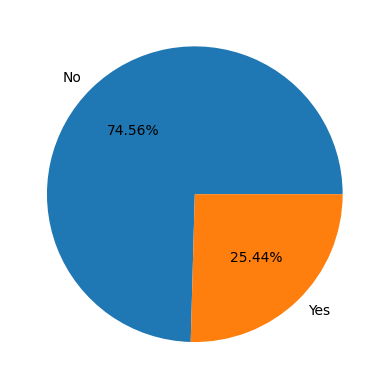

In [13]:
#Pie chart - checking whether the outcome data is balanced
print(data.income.value_counts())
data.income.value_counts().plot.pie(labels=("No","Yes"),autopct="%.2f%%", label="")

Target data is imbalanced. The majority of the individuals in the dataset have an income of 50K or less. 

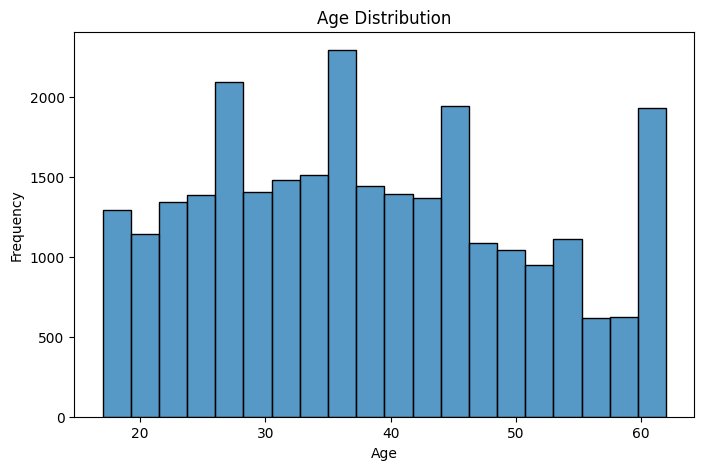

In [14]:
# Age distribution
plt.figure(figsize=(8, 5))
sns.histplot(data['age'], kde=False, bins=20)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

The majority of individuals in the dataset are between the ages of 25 and 45, indicating that most of the working population is in their prime working years.

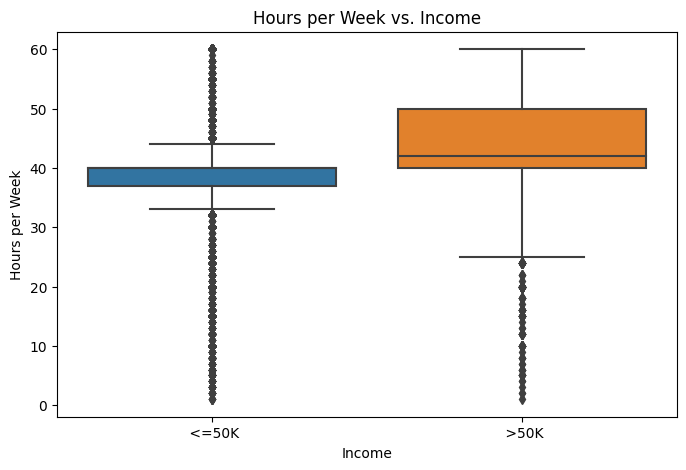

In [15]:
# Plot 3: Hours per Week vs. Income
plt.figure(figsize=(8, 5))
sns.boxplot(data=data, x='income', y='hours-per-week')
plt.title("Hours per Week vs. Income")
plt.xlabel("Income")
plt.ylabel("Hours per Week")
plt.show()

People who earn more than 50K per year tend to work longer hours per week on average compared to those who earn less than 50K per year

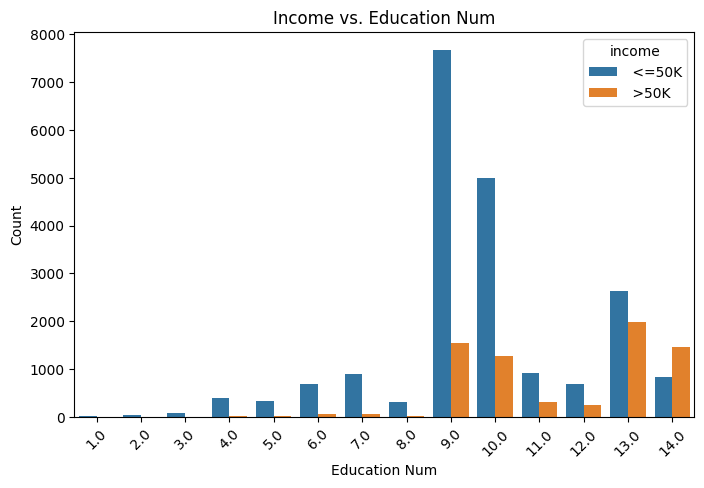

In [16]:
# Income vs. Education Num
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='education-num', hue='income', order=sorted(data['education-num'].unique()))
plt.title("Income vs. Education Num")
plt.xlabel("Education Num")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

Individuals with higher education_num values (corresponding to higher education levels) are more likely to earn more than 50K a year compared to those with lower education_num values.

# V. Data processing:

### Preprocessing

In [17]:
# Encode categorical features
categorical_columns = ['workclass', 'relationship', 'race']
data = pd.get_dummies(data, columns=categorical_columns)

# Encode target variable
data['income'] = data['income'].map({' <=50K': 0, ' >50K': 1})

# Scale continuous features
scaler = StandardScaler()
numerical_columns = ['age', 'education-num', 'hours-per-week']
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

### Train Test Split

In [18]:
from sklearn.model_selection import train_test_split

# Separate the features (X) and the target variable (y)
X = data.drop(['income'], axis=1)
y = data['income']

# Split the dataset into a training set (80%) and a testing set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 1. Logistic Regression Model

In [19]:
from sklearn.linear_model import LogisticRegression

# Train the Logistic Regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Get the classes, intercept, and coefficients
classes = log_reg.classes_
intercept = log_reg.intercept_
coefficients = log_reg.coef_

# Print the classes, intercept, and coefficients
print("Classes:", classes)
print("Intercept:", intercept)
print("Coefficients:", coefficients)

Classes: [0 1]
Intercept: [-2.46143024]
Coefficients: [[ 0.49656394  0.90810011  0.45798553  0.65317375 -0.012987    0.19765475
   0.6174765  -0.35302238 -0.02093433 -1.16312317  1.556346   -0.53558469
  -0.77448096 -1.60333028 -0.80406163  2.07934968 -0.41092299  0.34511745
  -0.02189204 -0.19952474  0.20546045]]


/Users/dungdo/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
#Probability Matrix
log_reg.predict_proba(X_test)

array([[0.85650005, 0.14349995],
       [0.74862589, 0.25137411],
       [0.60527935, 0.39472065],
       ...,
       [0.93625347, 0.06374653],
       [0.98449655, 0.01550345],
       [0.99145608, 0.00854392]])

In [21]:
#Predicted Values
log_reg.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [22]:
# Calculate the accuracy score for the training set
train_score = log_reg.score(X_train, y_train)

# Calculate the accuracy score for the test set
test_score = log_reg.score(X_test, y_test)

# Print the scores
print(f"Training set accuracy score: {train_score:.2f}")
print(f"Test set accuracy score: {test_score:.2f}")

Training set accuracy score: 0.82
Test set accuracy score: 0.83


/Users/dungdo/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


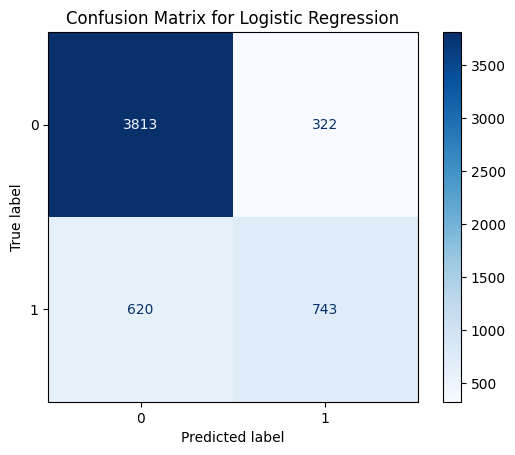

In [23]:
# Calculate and plot the confusion matrix
y_pred = log_reg.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(log_reg, X_test, y_test, cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

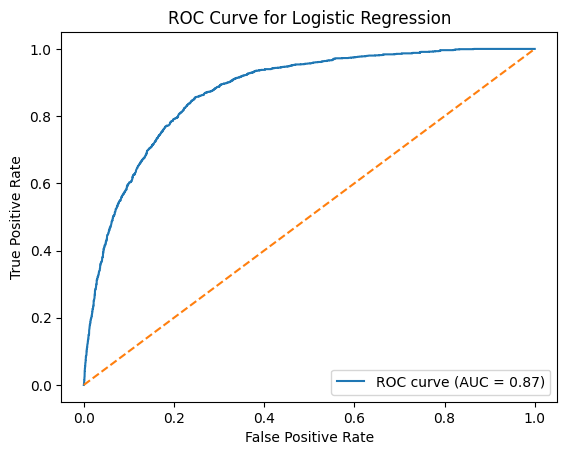

In [24]:
# Make predictions on the test data
y_pred_prob = log_reg.predict_proba(X_test)[:,1]

# Compute the AUC score
auc_score = roc_auc_score(y_test, y_pred_prob)

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot the ROC curve and AUC score
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc="lower right")
plt.show()

In [25]:
# Generate the classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      4135
           1       0.70      0.55      0.61      1363

    accuracy                           0.83      5498
   macro avg       0.78      0.73      0.75      5498
weighted avg       0.82      0.83      0.82      5498



In [26]:
accu_scr = []
one_recall = []
one_recall.append(recall_score(y_test, y_pred))
accu_scr.append(accuracy_score(y_test, y_pred))

## 2. KNN Classifier


In [27]:
from sklearn.neighbors import KNeighborsClassifier
# Train the KNN classifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [28]:
#Probability Matrix
knn.predict_proba(X_test)

array([[0.8, 0.2],
       [0.6, 0.4],
       [0.6, 0.4],
       ...,
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ]])

In [29]:
#Predicted Values
knn.predict(X_test)

/Users/dungdo/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([0, 0, 0, ..., 0, 0, 0])

In [30]:
# Calculate the accuracy score for the training set
train_score = knn.score(X_train, y_train)

# Calculate the accuracy score for the test set
test_score = knn.score(X_test, y_test)

# Print the scores
print(f"Training set accuracy score: {train_score:.2f}")
print(f"Test set accuracy score: {test_score:.2f}")

/Users/dungdo/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Training set accuracy score: 0.85
Test set accuracy score: 0.80


/Users/dungdo/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


/Users/dungdo/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/dungdo/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/dungdo/opt/anaconda3/lib/python3.9/site-packa

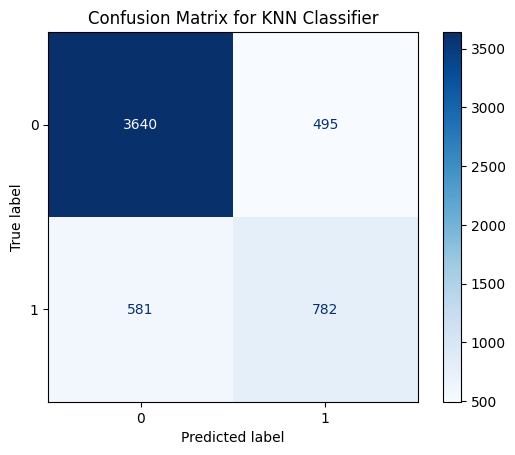

In [31]:
# Calculate and plot the confusion matrix
y_pred = knn.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(knn, X_test, y_test, cmap=plt.cm.Blues)
plt.title('Confusion Matrix for KNN Classifier')
plt.show()

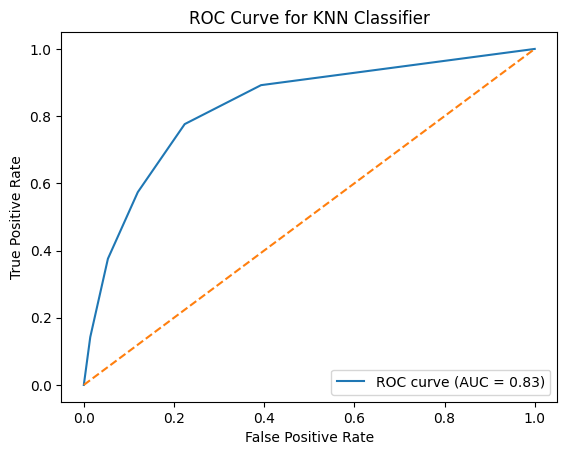

In [32]:
# Make predictions on the test data
y_pred_prob = knn.predict_proba(X_test)[:,1]

# Compute the AUC score
auc_score = roc_auc_score(y_test, y_pred_prob)

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot the ROC curve and AUC score
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN Classifier')
plt.legend(loc="lower right")
plt.show()


In [33]:
# Generate the classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      4135
           1       0.61      0.57      0.59      1363

    accuracy                           0.80      5498
   macro avg       0.74      0.73      0.73      5498
weighted avg       0.80      0.80      0.80      5498



In [34]:
one_recall.append(recall_score(y_test, y_pred))
accu_scr.append(accuracy_score(y_test, y_pred))

## 3. Tree Decision Classifier

In [35]:
from sklearn.tree import DecisionTreeClassifier

# Train the Decision Tree Classifier
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [36]:
#Probability Matrix
dt_clf.predict_proba(X_test)


array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [37]:
#Predicted Values
dt_clf.predict(X_test)

array([0, 0, 1, ..., 0, 0, 0])

In [38]:
# Calculate the accuracy score for the training set
train_score = dt_clf.score(X_train, y_train)

# Calculate the accuracy score for the test set
test_score = dt_clf.score(X_test, y_test)

# Print the scores
print(f"Training set accuracy score: {train_score:.2f}")
print(f"Test set accuracy score: {test_score:.2f}")

Training set accuracy score: 0.92
Test set accuracy score: 0.79


/Users/dungdo/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


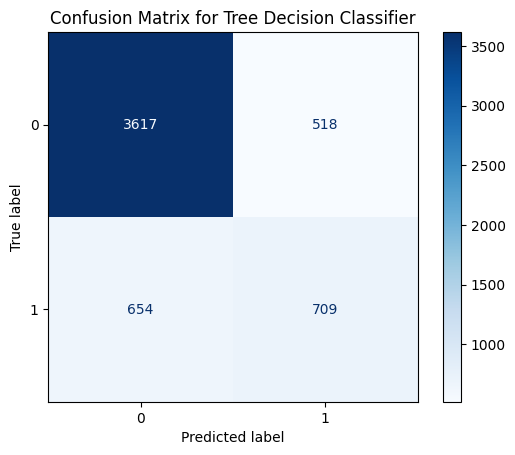

In [39]:
# Calculate and plot the confusion matrix
y_pred = dt_clf.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(dt_clf, X_test, y_test, cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Tree Decision Classifier')
plt.show()

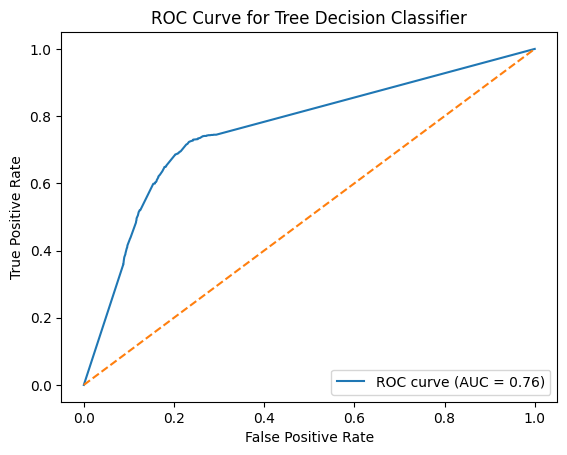

In [40]:
# Make predictions on the test data
y_pred_prob = dt_clf.predict_proba(X_test)[:,1]

# Compute the AUC score
auc_score = roc_auc_score(y_test, y_pred_prob)

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot the ROC curve and AUC score
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Tree Decision Classifier')
plt.legend(loc="lower right")
plt.show()


In [41]:
# Generate the classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      4135
           1       0.58      0.52      0.55      1363

    accuracy                           0.79      5498
   macro avg       0.71      0.70      0.70      5498
weighted avg       0.78      0.79      0.78      5498



In [42]:
one_recall.append(recall_score(y_test, y_pred))
accu_scr.append(accuracy_score(y_test, y_pred))

## 4. SVM

In [43]:
from sklearn.svm import SVC

# Train the SVM classifier
svm_clf = SVC(random_state=42, probability = True)
svm_clf.fit(X_train, y_train)

SVC(probability=True, random_state=42)

In [44]:
#Probability Matrix
svm_clf.predict_proba(X_test)

array([[0.86897371, 0.13102629],
       [0.88975855, 0.11024145],
       [0.74617523, 0.25382477],
       ...,
       [0.87529734, 0.12470266],
       [0.87690993, 0.12309007],
       [0.86894449, 0.13105551]])

In [45]:
#Predicted Values
svm_clf.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [46]:
# Calculate the accuracy score for the training set
train_score = svm_clf.score(X_train, y_train)

# Calculate the accuracy score for the test set
test_score = svm_clf.score(X_test, y_test)

# Print the scores
print(f"Training set accuracy score: {train_score:.2f}")
print(f"Test set accuracy score: {test_score:.2f}")

Training set accuracy score: 0.82
Test set accuracy score: 0.83


/Users/dungdo/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


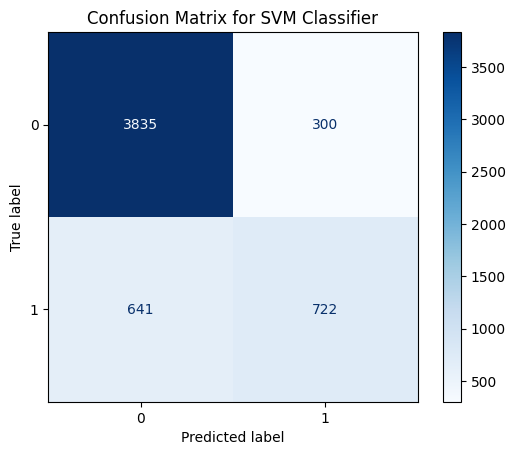

In [47]:
# Calculate and plot the confusion matrix
y_pred = svm_clf.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(svm_clf, X_test, y_test, cmap=plt.cm.Blues)
plt.title('Confusion Matrix for SVM Classifier')
plt.show()

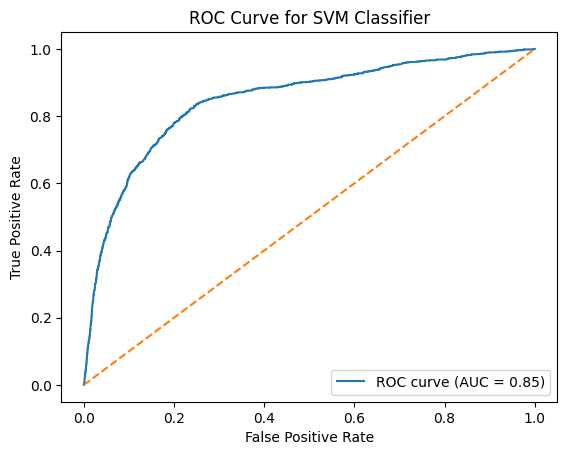

In [48]:
# Make predictions on the test data
y_pred_prob = svm_clf.predict_proba(X_test)[:,1]

# Compute the AUC score
auc_score = roc_auc_score(y_test, y_pred_prob)

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot the ROC curve and AUC score
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM Classifier')
plt.legend(loc="lower right")
plt.show()

In [49]:
# Generate the classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.93      0.89      4135
           1       0.71      0.53      0.61      1363

    accuracy                           0.83      5498
   macro avg       0.78      0.73      0.75      5498
weighted avg       0.82      0.83      0.82      5498



In [50]:
one_recall.append(recall_score(y_test, y_pred))
accu_scr.append(accuracy_score(y_test, y_pred))

## 5. Random Forest Classifier

In [51]:
from sklearn.ensemble import RandomForestClassifier

# Train the Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [52]:
#Probability Matrix
rf_clf.predict_proba(X_test)

array([[0.79977858, 0.20022142],
       [0.62711111, 0.37288889],
       [0.3087381 , 0.6912619 ],
       ...,
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ]])

In [53]:
#Predicted Values
rf_clf.predict(X_test)

array([0, 0, 1, ..., 0, 0, 0])

In [54]:
# Calculate the accuracy score for the training set
train_score = rf_clf.score(X_train, y_train)

# Calculate the accuracy score for the test set
test_score = rf_clf.score(X_test, y_test)

# Print the scores
print(f"Training set accuracy score: {train_score:.2f}")
print(f"Test set accuracy score: {test_score:.2f}")

Training set accuracy score: 0.92
Test set accuracy score: 0.80


/Users/dungdo/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


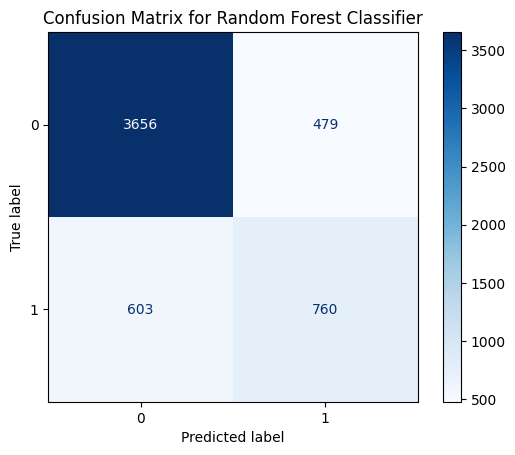

In [55]:
# Calculate and plot the confusion matrix
y_pred = rf_clf.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(rf_clf, X_test, y_test, cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

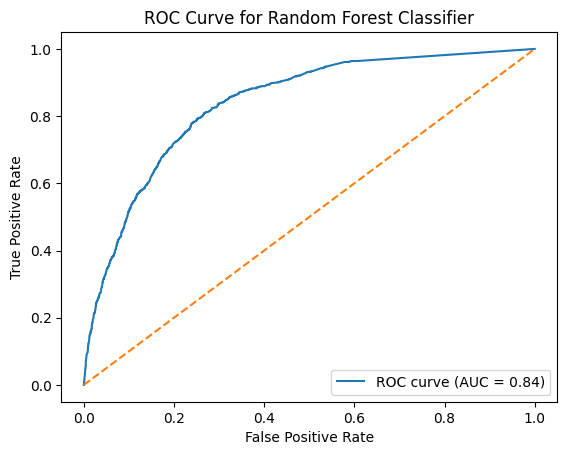

In [56]:
# Make predictions on the test data
y_pred_prob = rf_clf.predict_proba(X_test)[:,1]

# Compute the AUC score
auc_score = roc_auc_score(y_test, y_pred_prob)

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot the ROC curve and AUC score
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Classifier')
plt.legend(loc="lower right")
plt.show()

In [57]:
# Generate the classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      4135
           1       0.61      0.56      0.58      1363

    accuracy                           0.80      5498
   macro avg       0.74      0.72      0.73      5498
weighted avg       0.80      0.80      0.80      5498



In [58]:
one_recall.append(recall_score(y_test, y_pred))
accu_scr.append(accuracy_score(y_test, y_pred))

# VI. Comparing models

In [59]:
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('SVM', SVC()),
    ('KNN', KNeighborsClassifier())
]

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

#List to plot
accu = []
stdaccu = []
onerc = []
stdonerc = []

for name, model in models:
    accuracy = []
    f1 = []
    precision = []
    recall = []
    recall_1 = []

    for train_index, test_index in kfold.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        accuracy.append(accuracy_score(y_test, y_pred))
        f1.append(f1_score(y_test, y_pred, average='weighted'))
        precision.append(precision_score(y_test, y_pred, average='weighted'))
        recall.append(recall_score(y_test, y_pred, average='weighted'))
        recall_1.append(recall_score(y_test, y_pred))
        
    onerc.append(np.mean(recall_1)) 
    stdonerc.append(np.std(recall_1))
    accu.append(np.mean(accuracy))
    stdaccu.append(np.std(accuracy))
    
    print(f"{name}:")
    print(f"  Accuracy: {np.mean(accuracy):.4f} (+/- {np.std(accuracy):.4f})")
    print(f"  F1 Score: {np.mean(f1):.4f} (+/- {np.std(f1):.4f})")
    print(f"  Precision: {np.mean(precision):.4f} (+/- {np.std(precision):.4f})")
    print(f"  Recall: {np.mean(recall):.4f} (+/- {np.std(recall):.4f})")
    print()


/Users/dungdo/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/dungdo/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

Logistic Regression:
  Accuracy: 0.8216 (+/- 0.0045)
  F1 Score: 0.8138 (+/- 0.0050)
  Precision: 0.8125 (+/- 0.0050)
  Recall: 0.8216 (+/- 0.0045)

Decision Tree:
  Accuracy: 0.7844 (+/- 0.0058)
  F1 Score: 0.7789 (+/- 0.0054)
  Precision: 0.7758 (+/- 0.0055)
  Recall: 0.7844 (+/- 0.0058)

Random Forest:
  Accuracy: 0.8029 (+/- 0.0048)
  F1 Score: 0.7984 (+/- 0.0047)
  Precision: 0.7959 (+/- 0.0047)
  Recall: 0.8029 (+/- 0.0048)

SVM:
  Accuracy: 0.8228 (+/- 0.0033)
  F1 Score: 0.8133 (+/- 0.0039)
  Precision: 0.8132 (+/- 0.0035)
  Recall: 0.8228 (+/- 0.0033)



/Users/dungdo/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/dungdo/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer

KNN:
  Accuracy: 0.8059 (+/- 0.0042)
  F1 Score: 0.8023 (+/- 0.0037)
  Precision: 0.8001 (+/- 0.0036)
  Recall: 0.8059 (+/- 0.0042)



/Users/dungdo/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


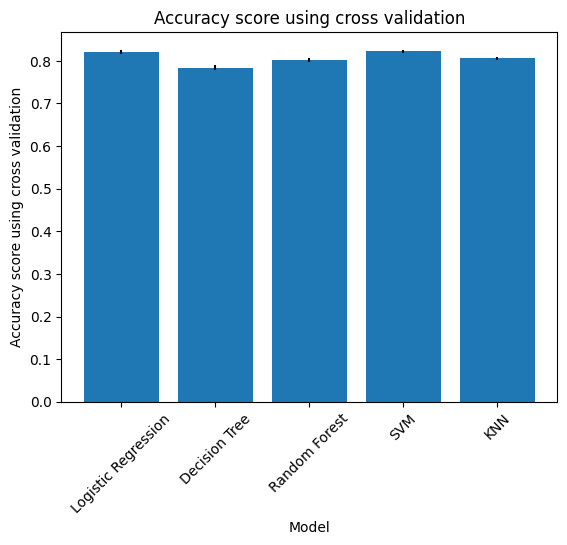

In [60]:
# Bar graph represents recall score for 5 models Cross validation
plt.bar(["Logistic Regression", "Decision Tree", 'Random Forest', "SVM", "KNN"], 
        accu, yerr = stdaccu)
plt.xlabel("Model")
plt.ylabel("Accuracy score using cross validation")
plt.title("Accuracy score using cross validation")
plt.xticks(rotation = 45)
plt.show()

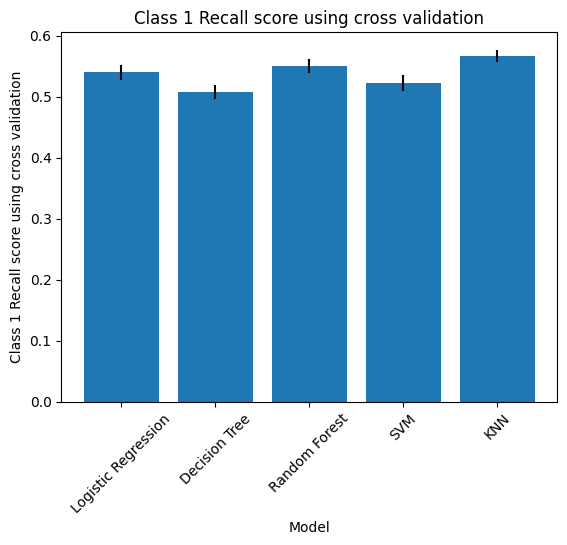

In [61]:
# Bar graph represents recall score for 5 models Cross validation
plt.bar(["Logistic Regression", "Decision Tree", 'Random Forest', "SVM", "KNN"], 
        onerc, yerr = stdonerc)
plt.xlabel("Model")
plt.ylabel("Class 1 Recall score using cross validation")
plt.title("Class 1 Recall score using cross validation")
plt.xticks(rotation = 45)
plt.show()

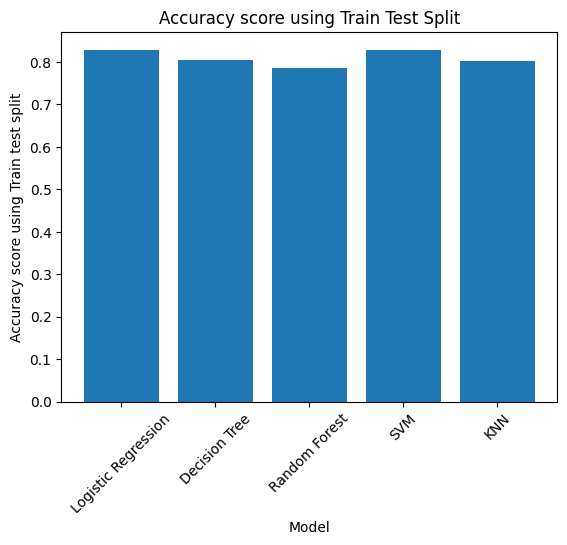

In [62]:
# Bar graph represents accuracy score for 4 models using Train Test Split
plt.bar(["Logistic Regression", "Decision Tree", 'Random Forest', "SVM", "KNN"], 
        accu_scr)
plt.xlabel("Model")
plt.ylabel("Accuracy score using Train test split")
plt.title("Accuracy score using Train Test Split")
plt.xticks(rotation = 45)
plt.show()

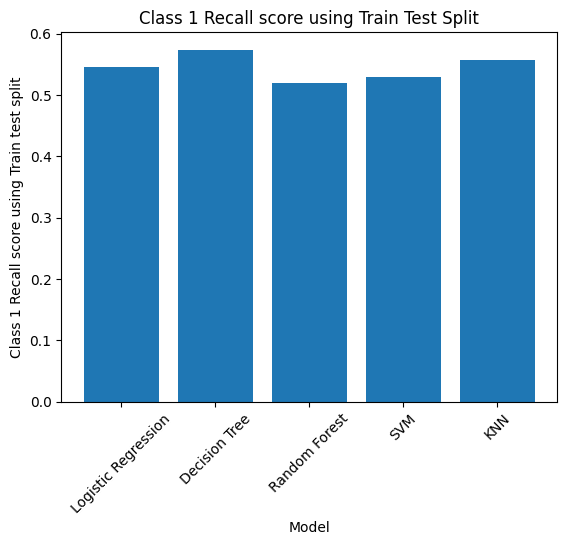

In [63]:
# Bar graph represents accuracy score for 4 models using Train Test Split
plt.bar(["Logistic Regression", "Decision Tree", 'Random Forest', "SVM", "KNN"], 
        one_recall)
plt.xlabel("Model")
plt.ylabel("Class 1 Recall score using Train test split")
plt.title("Class 1 Recall score using Train Test Split")
plt.xticks(rotation = 45)
plt.show()

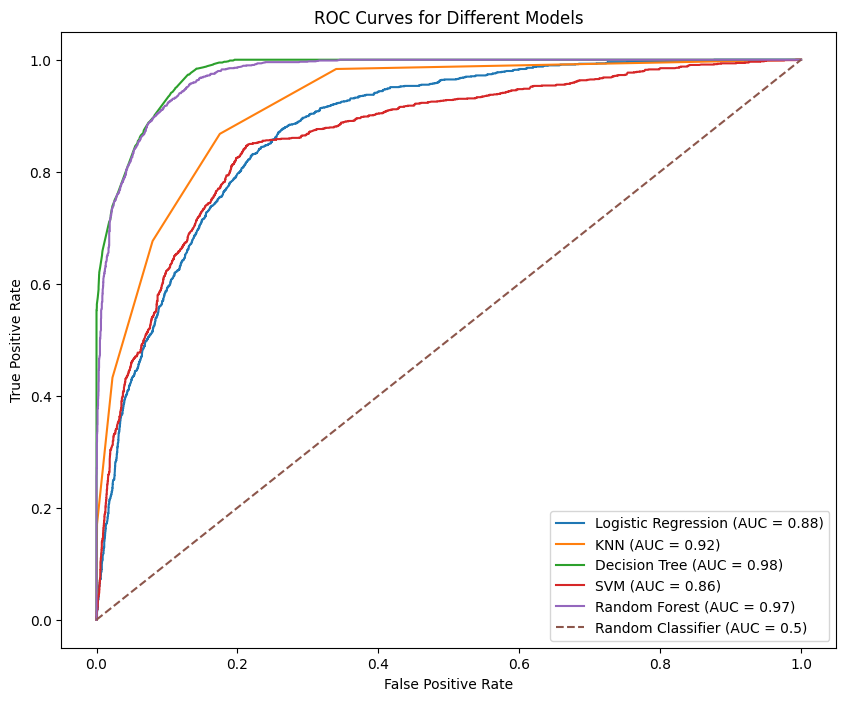

In [64]:
# Create a dictionary to store the models and their labels
models = {'Logistic Regression': log_reg,
          'KNN': knn,
          'Decision Tree': dt_clf,
          'SVM': svm_clf,
          'Random Forest': rf_clf}

# Initialize the plot
plt.figure(figsize=(10, 8))

# Plot the ROC curve for each model
for model_label, model in models.items():
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    auc_score = roc_auc_score(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label=f"{model_label} (AUC = {auc_score:.2f})")

# Plot the diagonal line representing a random classifier
plt.plot([0, 1], [0, 1], '--', label="Random Classifier (AUC = 0.5)")

# Set the axis labels, title, and legend
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Different Models")
plt.legend(loc="lower right")
plt.show()

Begin by creating a list of all the mentioned models and then apply cross-validation using K-Fold with n_splits=5. Next, use a loop with enumerate to calculate each model's recall score. The recall score is chosen because the data is imbalanced, and if the model were to simply predict the majority class for every instance, it would still achieve over 70% accuracy, rendering the result meaningless.

To visualize the results, create a bar chart displaying the recall scores for each model on the same plot. When considering recall scores from cross-validation, the order of the top-performing models is found to be KNN, Random Forest, Logistic Regression, SVM, and Decision Tree. However, when recall scores are calculated using train-test split, a different order emerges : Decision Tree, KNN, Logistic Regression, SVM, and Random Forest.

When using the AUC score as the evaluation metric, the model performance order becomes Decision Tree, Random Forest, KNN, Logistic Regression, and SVM.

Taking into account both evaluation methods and all three metrics, the top-performing models are:
    1. KNN
    2. Decision Tree 
    3. Random Forest
    4. Logistic Regression
    5. SVM